#### goal: extend linear models into polynomial models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#make_moons: creates a huge amount of data points (100 by default)
#it creates 2 moons we can use for classification
from sklearn.datasets import make_moons

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression

#PolynomialFeatures creates combinations of all of the features
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons()

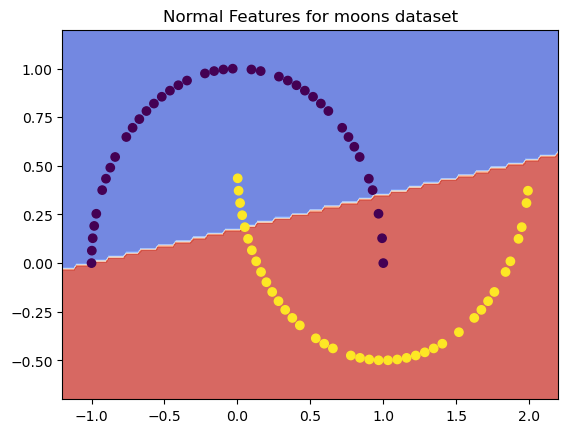

In [2]:
#stratified shuffle
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in stratSplit.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]

#fit and plot a logistic regression
def fitAndPlot(X, y, a = 0, b = 1):
    log_reg = LogisticRegression(C=1e5, max_iter=100)
    log_reg.fit(X, y)
    h = .02
    x_min, x_max = X[:, a].min() - 1, X[:, a].max() + 1
    y_min, y_max = X[:, b].min() - 1, X[:, b].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xx_r = xx.ravel()
    yy_r = yy.ravel()
    Z = log_reg.predict(np.c_[xx_r, yy_r])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, a],X[:, b],c=y)
    plt.xlim(-1.2,2.2)
    plt.ylim(-0.7,1.2)
    plt.title("Normal Features for moons dataset")

fitAndPlot(X_train, y_train)

#result: 2 moons that represent 2 different classes

In [3]:
#initiate the polynomial features
poly_feat = PolynomialFeatures(degree=3) #degree: degree of the polynomial we want (3 has two bumps because of two curves)
X_poly = poly_feat.fit_transform(X_train)

In [4]:
X_train[0]

array([ 1.67230089, -0.240278  ])

In [5]:
poly_feat.powers_ #[power of feature 1, power of feature 2, ..., power of feature n]
#feature_1*pow_1*feature_2*pow_2*...*feature_n*pow_n

array([[0, 0],
       [1, 0],
       [0, 1],
       [2, 0],
       [1, 1],
       [0, 2],
       [3, 0],
       [2, 1],
       [1, 2],
       [0, 3]])

In [6]:
X_poly[0] #gives us combinations of the X_train[0] coordinates up to a certain degree

array([ 1.        ,  1.67230089, -0.240278  ,  2.79659027, -0.40181711,
        0.05773352,  4.67674039, -0.67195911,  0.09654781, -0.01387209])

In [19]:
#calculation for distinct features: coordinates from our array (above) used as power coordinates
#in our X_train[0,0] and X_train[0,1]: 
#feature_coord = X_train[0,0]**coord1 * X_train[0,1]**coord2

#first feature
first_feature = X_train[0, 0]**0*X_train[0, 1]**0
print(f'first feature: {first_feature}')

#second feature
second_feature = X_train[0, 0]**1*X_train[0, 1]**0
print(f'second feature: {second_feature}')

#third feature
third_feature = X_train[0, 0]**0*X_train[0, 1]**1
print(f'third feature: {third_feature}')

#fourth feature
fourth_feature = X_train[0, 0]**2*X_train[0, 1]**0
print(f'fourth feature: {fourth_feature}')

first feature: 1.0
second feature: 1.6723008902613166
third feature: -0.24027799707531572
fourth feature: 2.796590267568792


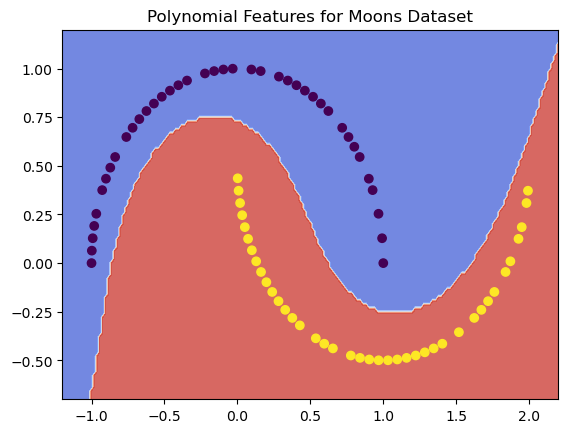

In [26]:
def fitAndPlotThreePoly(X, y):
    """
    Fits a logistic regression model with polynomial features and visualizes the decision boundary.

    Args:
        X: A 2D array of features (original features + polynomial features).
        y: A 1D array of target values.
    """

    # Create a logistic regression model with regularization
    log_reg = LogisticRegression(C=1e5, max_iter=100)  # Adjust C as needed

    # Fit the model to the data
    log_reg.fit(X, y)

    # Define meshgrid resolution for visualization
    h = 0.02  # Small spacing for smooth contour plot

    # Calculate feature minimum and maximum values for plotting range
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1

    # Create a grid of points for plotting
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Reshape the grid into a 2D array of data points
    #flattens a multidimensional array into a one-dimensional array
    xx_r = xx.ravel()
    yy_r = yy.ravel()

    # Predict class labels for each point in the grid
    Z = log_reg.predict(np.c_[np.ones(len(xx_r)), xx_r, yy_r, xx_r**2, xx_r*yy_r, yy_r**2, xx_r**3, xx_r**2*yy_r, xx_r*yy_r**2, yy_r**3])

    # Reshape the predictions into the grid shape for plotting
    Z = Z.reshape(xx.shape)

    # Create a contour plot of the decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)  # Colormap for visualization

    # Overlay scatter plot of original data points
    plt.scatter(X[:, 1], X[:, 2], c=y)  # Color-coded by true labels

    # Set plot limits based on feature ranges
    plt.xlim(-1.2, 2.2)
    plt.ylim(-0.7, 1.2)

    # Add a title
    plt.title("Polynomial Features for Moons Dataset")

# Call the function to visualize the decision boundary
fitAndPlotThreePoly(X_poly, y_train)
